In [213]:
## Context / Objective /

# 1. The number of restaurants in New York is increasing day by day
# 2. Food aggregator known as FoodHub offers multi access via smartphone app
# 3. Operates a system of delivery drivers and makes margins above the base price of products
# 4. They have collected data and want to see how demand for restauraunts relates to customer experience
# 5. order_id, customer_id, restauraunt_name, cuisine_type, cost, day_of_the_week, rating, food_preparation_time, delivery_time

In [214]:
#Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
## Imports And Dependencies for statistical analysis:

#Data Manipulation and Analysis:
import pandas as pd
import numpy as np

#Data Visualization:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For working with dates and times
import datetime

# For interactive visualizations
!pip install plotly
import plotly.express as px

#Statistical Analysis:
from scipy import stats
from scipy.stats import norm



In [216]:
# Import dataset from google drive and apply var
fooddata = pd.read_csv("/content/drive/MyDrive/Python Course/foodhub_order.csv")
# Display first 5 entries and column labels to ensure proper import
fooddata.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [217]:
# Question 1: How many rows and columns are present in the data? [0.5 mark]

# apply shape to dataframe using num counts:
num_rows, num_columns = fooddata.shape
# print the generated array more clearly for an answer:
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 1898
Number of columns: 9


In [218]:
# Question 2: What are the datatypes of the different columns in the dataset?
# (The info() function can be used) [0.5 mark]

# we already defined the var so we can pull it with .info()
fooddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [219]:
# Question 3: Are there any missing values in the data?
# If yes, treat them using an appropriate method. [1 mark]

# define var to hold missing count, find all missing total
missing_val = fooddata.isnull().sum()
#print a nice statement saying how many missing values
print("Number of missing values in the dataset:"
, missing_val)

#apply treatment
#replace all missing values with 'Not given' to indicated where participants didnt answer or missing value
fooddata.fillna('Not given', inplace=True)

#identify fringe case of tracking total number of 'not reported' ratings
not_given_count = (fooddata['rating'] == 'Not given').sum()
print("Number of 'not givem' ratings:", not_given_count)


Number of missing values in the dataset: order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Number of 'not givem' ratings: 736


In [220]:
# Question 4: Check the statistical summary of the data.
# What is the minimum, average, and maximum time it takes for food to be prepared
# once an order is placed? [2 marks]

#summary of the variable food prep using .describe
prep_summary = fooddata['food_preparation_time'].describe()
print(prep_summary)

#loggin the mean value from prep column as a var
mean_value = fooddata['food_preparation_time'].mean()

#loggin the min value from prep column as a var
min_value = fooddata['food_preparation_time'].min()

#loggin the max value from prep column as a var
max_value = fooddata['food_preparation_time'].max()

#print a clear and concise output of min/max/mean using vars and describing the number in minutes
print("Solution:")
print("Maximum prep time:", max_value, "minutes")
print("Minimum prep time:", min_value, "minutes")
print("Mean prep time:", mean_value, "minutes")

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
Solution:
Maximum prep time: 35 minutes
Minimum prep time: 20 minutes
Mean prep time: 27.371970495258168 minutes


In [221]:
# Question 5: How many orders are not rated? [1 mark]

# While looking at the data for number 3 I already developed this solution
# as missing values should have been defined as null values or empty values in above question
# regardless, the solution is the same and can be solved with the following code:

#identify fringe case of tracking total number of 'not reported' ratings
not_given_count = (fooddata['rating'] == 'Not given').sum()
print("Number of 'not givem' ratings:", not_given_count)

Number of 'not givem' ratings: 736


In [222]:
# Exploratory Data Analysis (EDA)

# Question 6: Explore all the variables and provide observations on their distributions.
# (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# let's check our data columns/types and store them for clarity and tracking in our processs
column_names = fooddata.columns.tolist()
print("Wer are looking at the followiung variables:", column_names)
print("With the following data types:", fooddata.dtypes)


Wer are looking at the followiung variables: ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']
With the following data types: order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


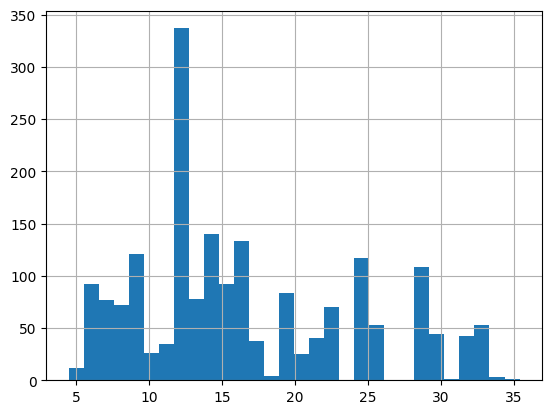

Order cost has the following attributes: count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
the spread of cost can be visualized as follows:


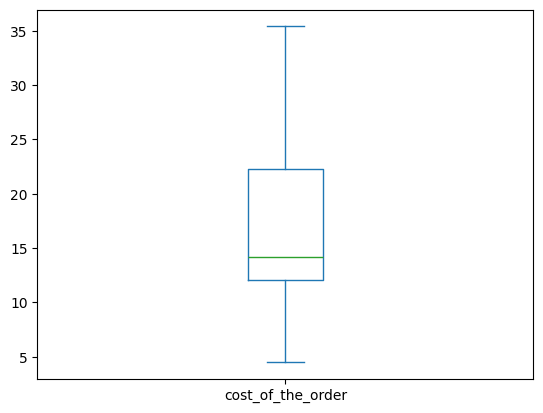

In [223]:
# Question 6, cont;

# we will use histograms, describe, boxplot for all our continous numeric values
# this will show us two interpretations of the spread of continous data

# testing continous numerical column: cost_of_the_order

fooddata['cost_of_the_order'].hist(bins=30)
plt.show()

print("Order cost has the following attributes:", fooddata['cost_of_the_order'].describe())

print("the spread of cost can be visualized as follows:")
fooddata['cost_of_the_order'].plot.box()
plt.show()

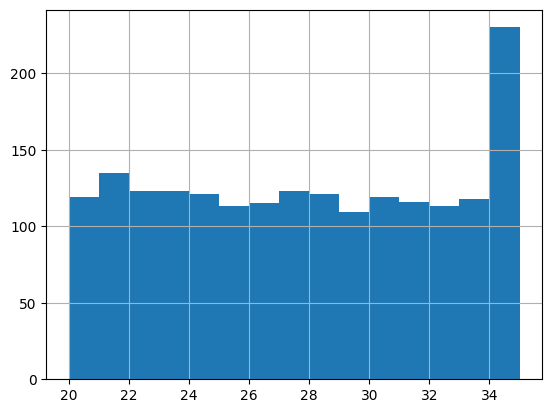

Food prep time has the following attributes: count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
the spread of prep time can be visualized as follows:


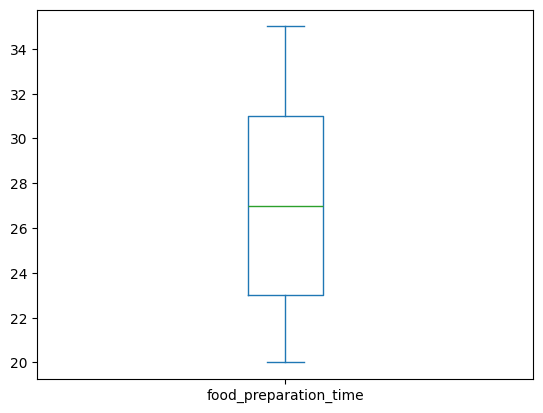

In [224]:
# Question 6, cont;

# we will use histograms, describe, boxplot for all our continous numeric values
# this will show us two interpretations of the spread of continous data

# testing continous numerical column: food_preparation_time
fooddata['food_preparation_time'].hist(bins=15)
plt.show()

print("Food prep time has the following attributes:", fooddata['food_preparation_time'].describe())

print("the spread of prep time can be visualized as follows:")
fooddata['food_preparation_time'].plot.box()
plt.show()

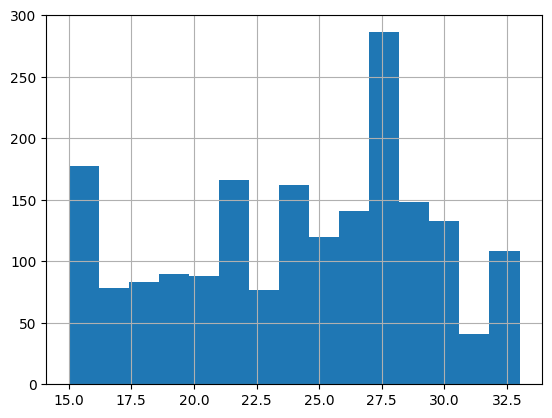

Delivery time has the following attributes: count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64
the spread of Delivery time can be visualized as follows:


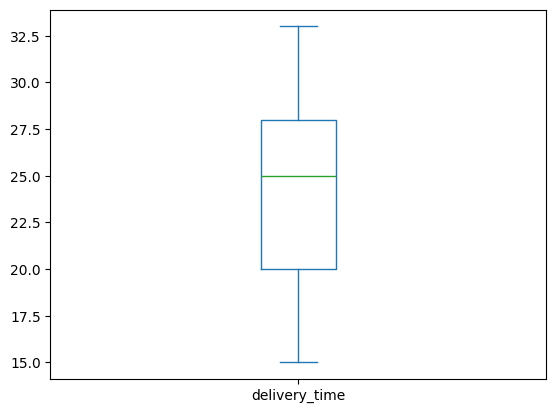

In [225]:
# Question 6, cont;

# we will use histograms, describe, boxplot for all our continous numeric values
# this will show us two interpretations of the spread of continous data

# testing continous numerical column: delivery_time

fooddata['delivery_time'].hist(bins=15)
plt.show()

print("Delivery time has the following attributes:", fooddata['delivery_time'].describe())

print("the spread of Delivery time can be visualized as follows:")
fooddata['delivery_time'].plot.box()
plt.show()

All values are unique: False
Number of unique values: 1200
Total count of values: 1898


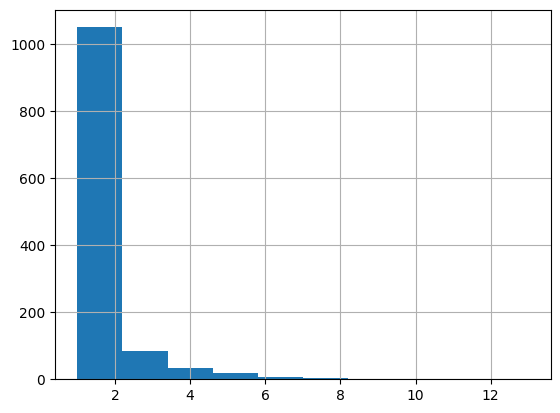

customer id has the following attributes: count    1200.000000
mean        1.581667
std         1.090560
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: count, dtype: float64


In [226]:
# Question 6, cont;

# then let's just generate standard solutions for the non-continous numeric columns

# is customer_id all unique values so we don't need to run a countplot on it?
# let's confirm this:
print("All values are unique:", fooddata['customer_id'].is_unique)
print("Number of unique values:", fooddata['customer_id'].nunique())
print("Total count of values:", len(fooddata['customer_id']))

# the only meaningful way to interpret this data involves looking at customer frequency and return rates
# we can use a value count histogram to show how many times customers tend to revisit

fooddata['customer_id'].value_counts().hist(bins=10); plt.show()

print("customer id has the following attributes:", fooddata['customer_id'].value_counts().describe())

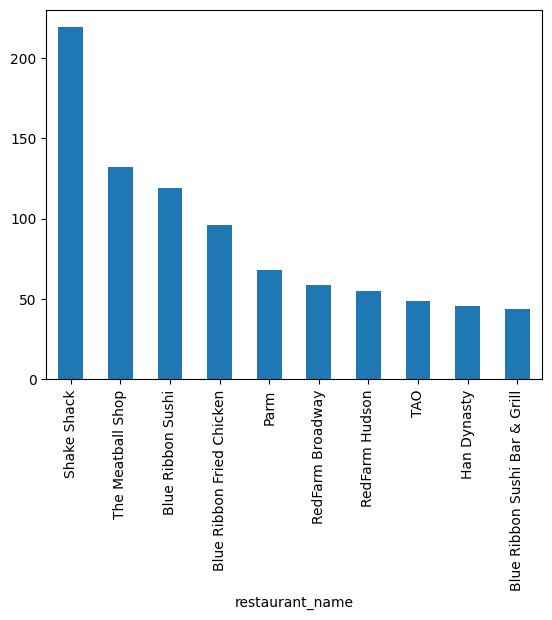

Restaurant name has the following attributes: count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object


In [227]:
# Question 6, cont;

# restauraunt name has a limited non-continous number of solutions
# but there are too many to reasonably attribute as individual x values
# we can take a brief look at the top restauraunts first

fooddata['restaurant_name'].value_counts().head(10).plot.bar()
plt.xticks(rotation=90)
plt.show()

print("Restaurant name has the following attributes:", fooddata['restaurant_name'].describe())

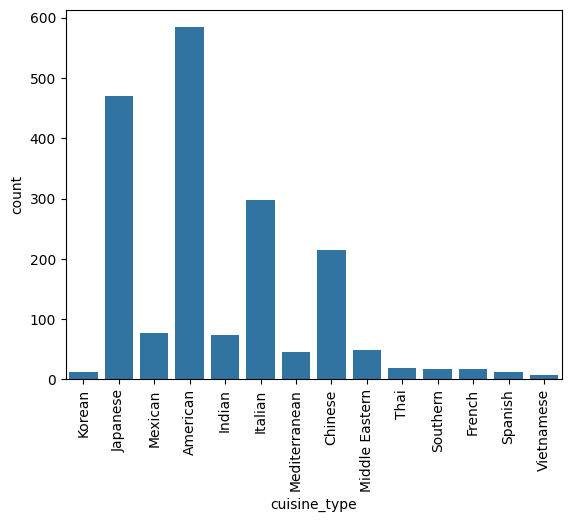

Cuisine type has the following attributes: count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object


In [228]:
# Question 6, cont;

# there is a more reasonable amount of cuisine types
# so we can plot each x label or cuisine type without skimming a top n

# we use countplot here for categorical analysis

sns.countplot(data=fooddata, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

print("Cuisine type has the following attributes:", fooddata['cuisine_type'].describe())

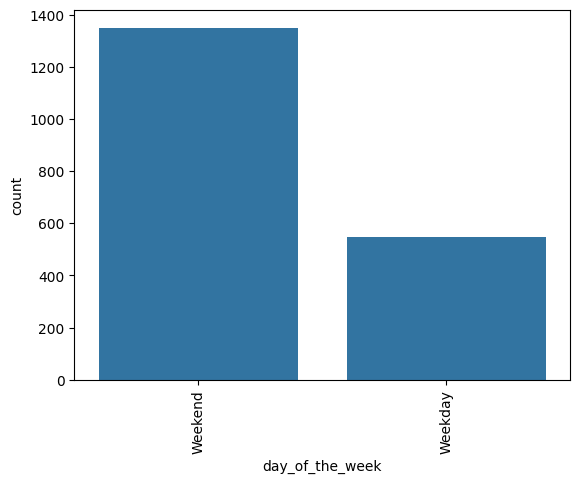

Day of the week has the following attributes: count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object


In [229]:
# Question 6, cont;

# day of the week is actually limited to two options
# in a univariate analysis our best

sns.countplot(data=fooddata, x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

print("Day of the week has the following attributes:", fooddata['day_of_the_week'].describe())

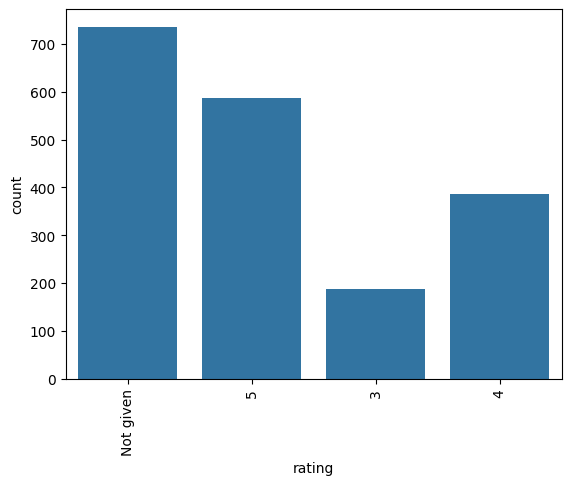

Rating of the week has the following attributes: count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object


In [230]:
#as these are not rating averages but set ratings with intervals 1 - 5 we can use countplot

sns.countplot(data=fooddata, x='rating')
plt.xticks(rotation=90)
plt.show()

print("Rating of the week has the following attributes:", fooddata['rating'].describe())

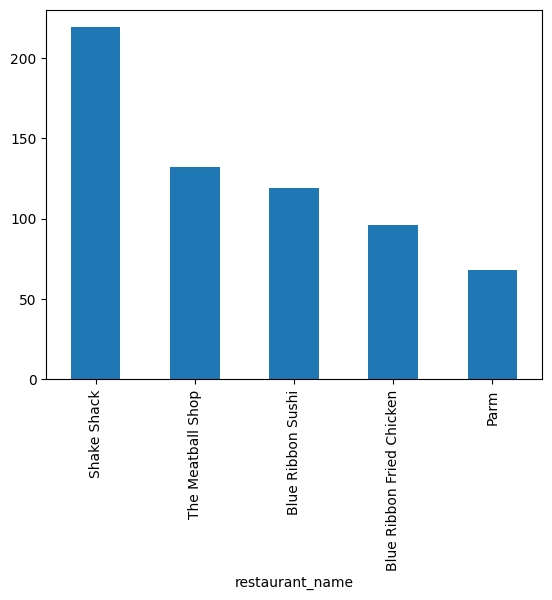

Top 5 restaurants and their order counts:
Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


In [231]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

# luckily we just did this for the top 10 so we can adjust our top_n defiinition of .head to 5:

fooddata['restaurant_name'].value_counts().head(5).plot.bar()
plt.xticks(rotation=90)
plt.show()

#we can also define this as a top_5 var in order to build out a list between name and count

top_5 = fooddata['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants and their order counts:")
for name, count in top_5.items():
    print(f"{name}: {count}")

In [232]:
# Question 8: Which is the most popular cuisine on weekends? [1 mark]

# 1. segment data to weekend_data by defining a new var
weekend_data = fooddata[fooddata['day_of_the_week'].isin(['Weekend'])]

# 2. using that segmented data, run a value count
print(weekend_data['cuisine_type'].value_counts())

#3. using idxmax confirm the highest count type and print answer
print("") #line indent for clarity
print("Most popular cuisine on weekends:")
print(weekend_data['cuisine_type'].value_counts().idxmax())

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

Most popular cuisine on weekends:
American


In [233]:
# Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

# we can either count or Area under curve % this
# we will use count and convert it into a percentage
# cost of order is continous and float

#segment the data with a new variable
over20 = fooddata[fooddata['cost_of_the_order'] > 20]
#print the len count of that new variable over 20
print("Number of orders over $20:", len(over20))
#define total order count
allorder = fooddata['cost_of_the_order']
print("Total orders count is:", len(allorder))
# compute percentage of over 20 using over20 and allorder var len(s)
percentage = (len(over20) / len(allorder)) * 100
print("Percentage of orders over $20:", percentage, "%")




Number of orders over $20: 555
Total orders count is: 1898
Percentage of orders over $20: 29.24130663856691 %


In [234]:
# Question 10: What is the mean order delivery time? [1 mark]

# I prefer to set vars to hold my values vs just letting them be temp store
mean_dt = fooddata['delivery_time'].mean()
# now let's print it in a nice statement
print("The mean order delivery time is:", mean_dt, "minutes")

The mean order delivery time is: 24.161749209694417 minutes


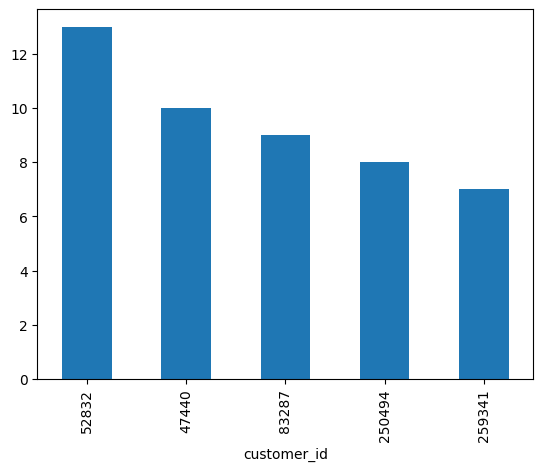

Top 5 customers and their order counts:
52832: 13
47440: 10
83287: 9
250494: 8
259341: 7


In [235]:
# Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers.
# Find the IDs of these customers and the number of orders they placed. [1 mark]

# we can use the same .head top_n and name/count process we used for top restauraunts
# we must be sure to utilize customer id attached to count

# identify value count of customer idea to top n of 5 customers
fooddata['customer_id'].value_counts().head(5).plot.bar()
plt.xticks(rotation=90)
plt.show()

# let's define a new top 5 customers var list and then print it concisely
top_5_customers = fooddata['customer_id'].value_counts().head(5)
print("Top 5 customers and their order counts:")
for name, count in top_5_customers.items():
    print(f"{name}: {count}")


In [236]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables
# in the dataset. (It is a good idea to explore relations between numerical variables
# as well as relations between numerical and categorical variables) [10 marks]

# a. we can begin with an over-arching pairplot that has numerical vars and categorical hues
# b. we can use heatmaps and corr for specific numerical variables
# c. we can use boxplots/violinplots and barplots to compare numerical and categorical vars
# d. we can use a stacked barplot compare categorical vars such as day of week and cuisine type

# e. summarize, we can use these multivariate analyses to draw insights



In [237]:
# Question 12 cont;

# A - Pairplot large

# let's define our numeric columns to contrast to categorical columns

num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

#we can use two different hue types (cuisine type, day of the week) let us try both

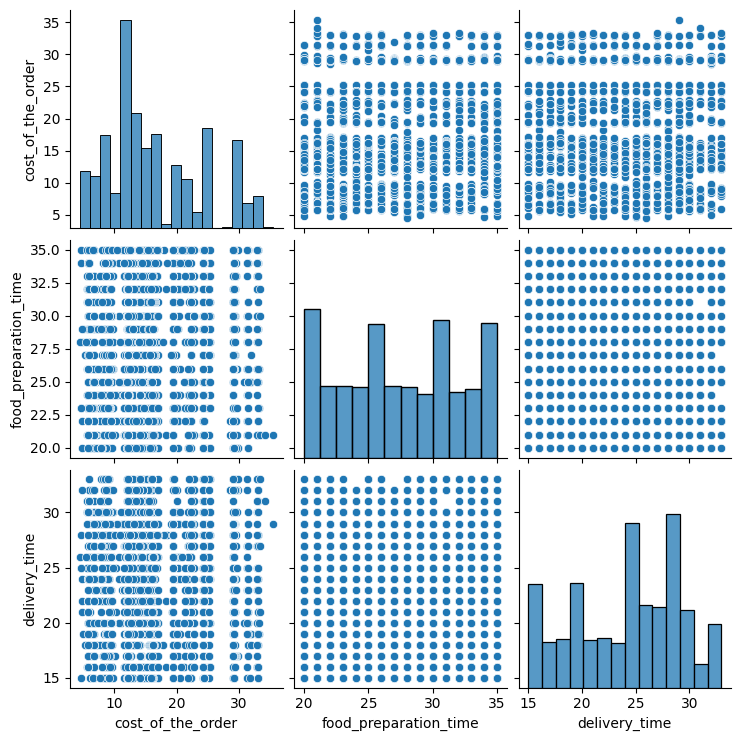

In [238]:
# Question 12 cont;

# A - Pairplot large

sns.pairplot(fooddata[num_cols])
plt.show()

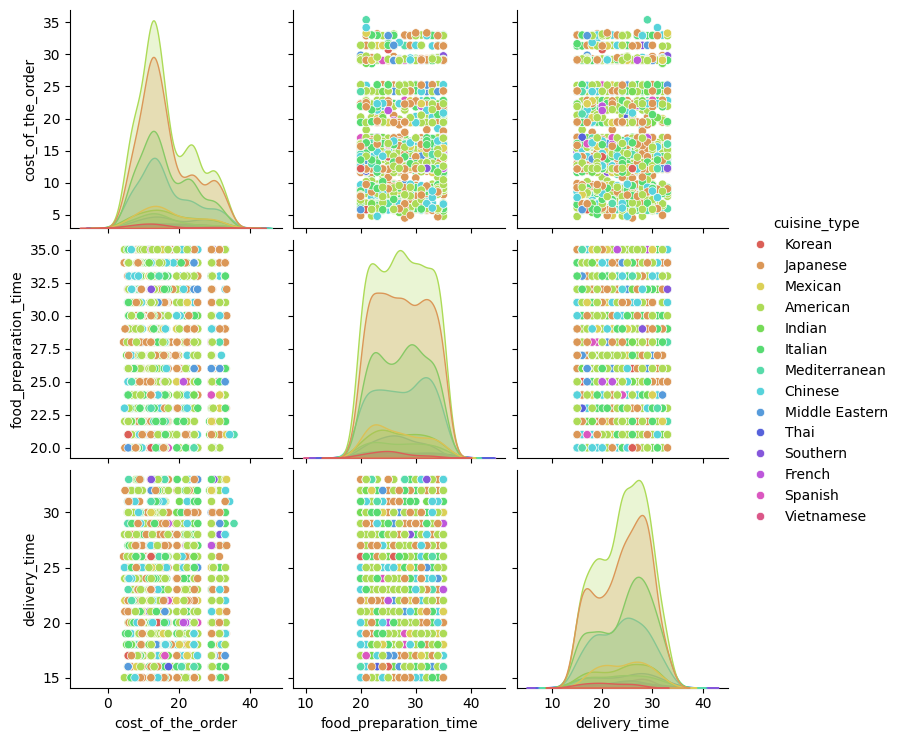

In [239]:
# Question 12 cont;

# A - Pairplot large

# we can also use a pairplot with hues for cuisine type
# to avoid error we are going to manual list vars despite defined above

sns.pairplot(fooddata,
vars=['cost_of_the_order',
'food_preparation_time',
'delivery_time'],
hue='cuisine_type',
palette='hls') #for color clarity
plt.show()

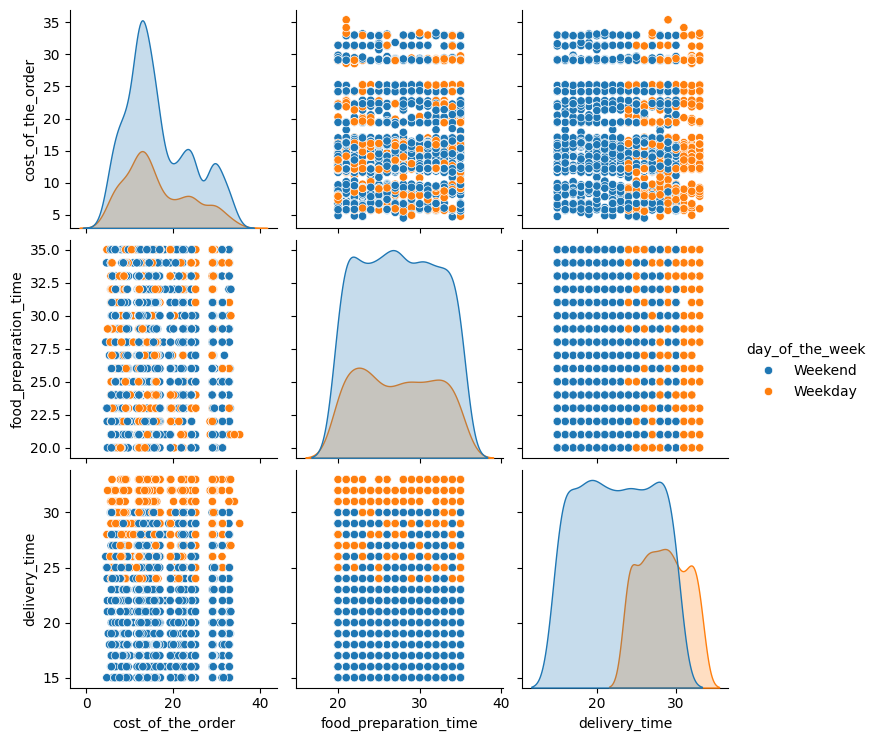

In [240]:
# Question 12 cont;

# A - Pairplot large

# we can also use a pairplot with hues for weekend/weekday
# to avoid error we are going to manual list vars despite defined above

sns.pairplot(fooddata,
vars=['cost_of_the_order',
'food_preparation_time',
'delivery_time'],
hue='day_of_the_week')
plt.show()

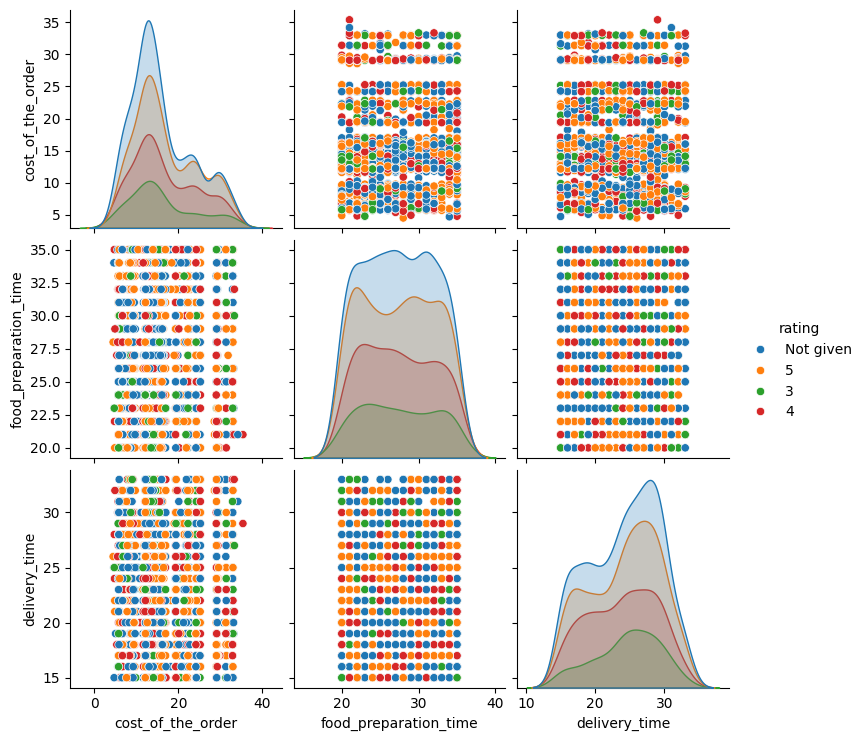

In [241]:
# Question 12 cont;

# A - Pairplot large

# we can also use a pairplot with hues for rating (categorical as both int and str)
# to avoid error we are going to manual list vars despite defined above

sns.pairplot(fooddata,
vars=['cost_of_the_order',
'food_preparation_time',
'delivery_time'],
hue='rating')
plt.show()

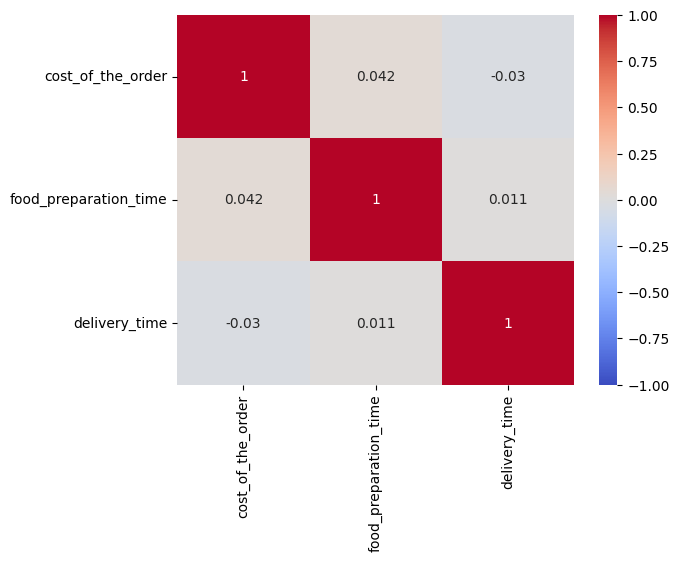

In [242]:
# Question 12 cont;

# b. we can use heatmaps and corr for specific numerical variables

# exemplified below is the correlation between all numerical columns

corr = fooddata[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

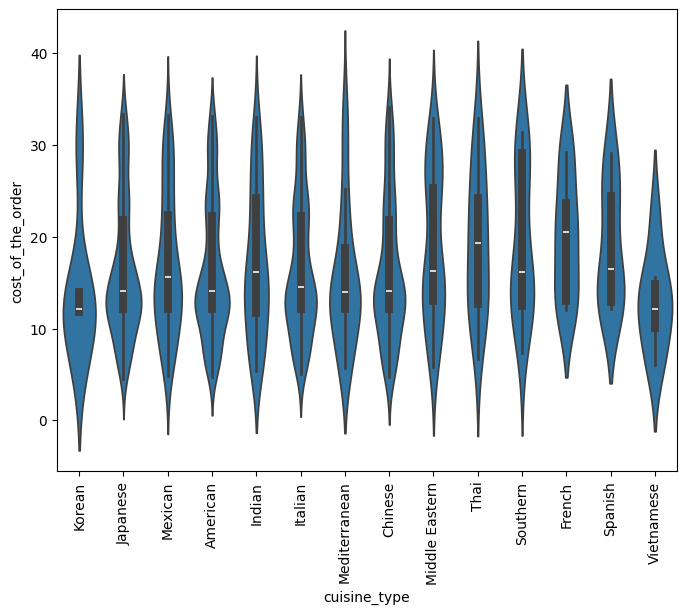

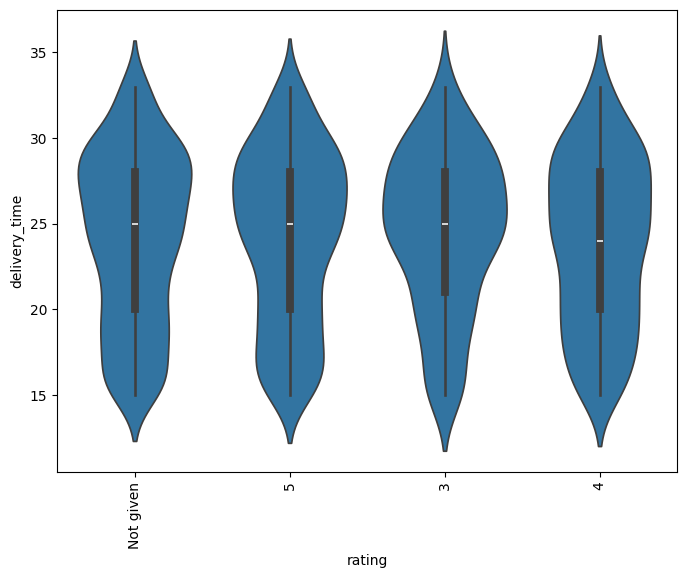

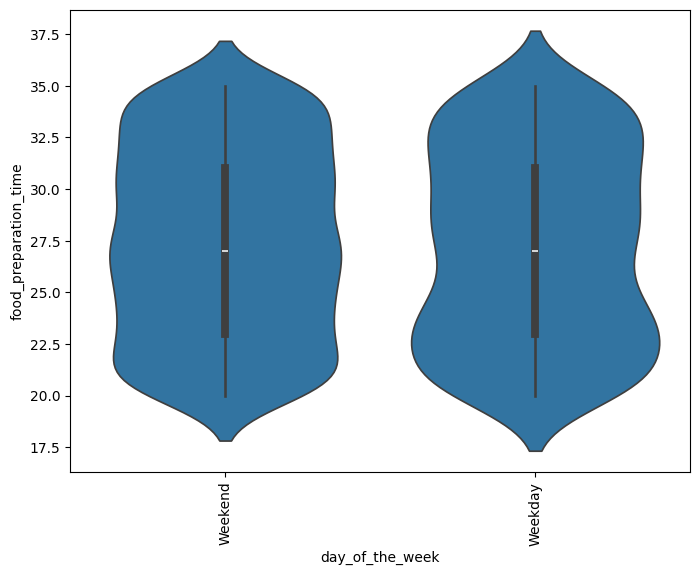

In [243]:
# Question 12 cont;

# c. we can use boxplots/violinplots and barplots to compare numerical and categorical distributions

plt.figure(figsize=(8, 6))
sns.violinplot(x='cuisine_type', y='cost_of_the_order', data=fooddata)
plt.xticks(rotation=90)
plt.show()

# let's compare the distribution of rating and delivery time

plt.figure(figsize=(8, 6))
sns.violinplot(x='rating', y='delivery_time', data=fooddata)
plt.xticks(rotation=90)
plt.show()

# let's compare the distribution of day of the week and food prep time

plt.figure(figsize=(8, 6))
sns.violinplot(x='day_of_the_week', y='food_preparation_time', data=fooddata)
plt.xticks(rotation=90)
plt.show()

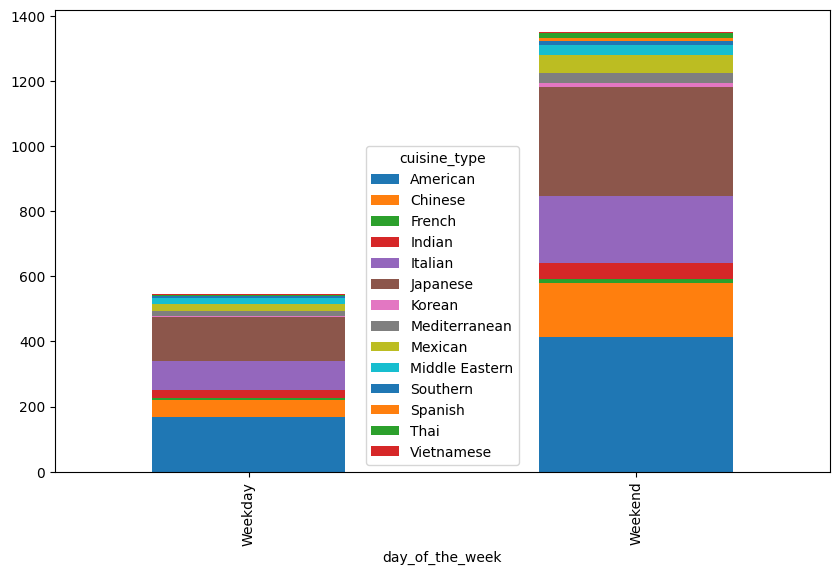

In [244]:
# Question 12 cont;

# d. we can use a stacked barplot compare categorical vars such as day of week and cuisine type

# let's define our categorical columns
catcol = pd.crosstab(fooddata['day_of_the_week'], fooddata['cuisine_type'])
catcol.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=90)
plt.show()

In [245]:
# Question 12 cont;

# e. summarize, we can use these multivariate analyses to draw insights
# using num_cols, cat_cols, cols, vars

# code line that will print out which num_col has the highest correlation
# define corr matrix around num cols
corr_matrix = fooddata[num_cols].corr()
# create an array to ignore self-correlatives
np.fill_diagonal(corr_matrix.values, 0)
# pull highest value
max_corr = corr_matrix.unstack().idxmax()
#print answer
print("Highest numeric correlation:", max_corr[0], "and", max_corr[1], "with correlation", corr_matrix.loc[max_corr[0], max_corr[1]])




Highest numeric correlation: cost_of_the_order and food_preparation_time with correlation 0.04152747282774483


In [246]:
# Question 12 cont;

# e. summarize, we can use these multivariate analyses to draw insights
# using num_cols, cat_cols, cols, vars

# code line that will print out which cuisine type is most prevalent on weekdays

#define most popular as the highest
most_popular_cuisine = fooddata[fooddata['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts().idxmax()
print("Most popular cuisine on weekdays:", most_popular_cuisine)


Most popular cuisine on weekdays: American


In [247]:
# Question 12 cont;

# e. summarize, we can use these multivariate analyses to draw insights
# using num_cols, cat_cols, cols, vars

# code line that will determine which num_cols has the lowest distribution spread

#define num_cols
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
#take the std of each col in num cols
spreads = {col: fooddata[col].std() for col in num_cols}
#use min to define lowest spread var
lowest_spread = min(spreads, key=spreads.get)
#print lowest spread var with spread
print(lowest_spread, "has lowest spread with std", spreads[lowest_spread])

food_preparation_time has lowest spread with std 4.63248077592887


In [248]:
# Question 12 cont;

# e. summarize, we can use these multivariate analyses to draw insights
# using num_cols, cat_cols, cols, vars

# code line that will print out if cost of order and delivery time have a positive or negative relationship or no relationship

#take correlation of two cols
corr = fooddata['cost_of_the_order'].corr(fooddata['delivery_time'])
# use an f statement to make a determination by output
if corr > 0:
    print("Positive relationship with correlation", corr)
elif corr < 0:
    print("Negative relationship with correlation", corr)
else:
    print("No relationship")

Negative relationship with correlation -0.029949184900648816


In [249]:
# Highest-rated cuisine type
# segment out the non numerics
cuisine_ratings = fooddata[fooddata['rating'] != 'Not given'].copy()
# convert numeric str to numeric float or int
cuisine_ratings['rating'] = cuisine_ratings['rating'].astype(float)
# group by means and call the max val
highest_rated = cuisine_ratings.groupby('cuisine_type')['rating'].mean().idxmax()
print("Highest-rated cuisine type:", highest_rated)

Highest-rated cuisine type: Spanish


In [250]:
# Highest-ordered cuisine type
highest_ordered = fooddata['cuisine_type'].value_counts().idxmax()
print("Highest-ordered cuisine type:", highest_ordered)

Highest-ordered cuisine type: American


In [251]:
# Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants.
# The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4.
# Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

# we can convert all of them to numerics but i'd rather count only ratings of numerics excluding not givens
numratings = fooddata[fooddata['rating'] != 'Not given'].copy()
# let's take all segmented str numbers and convert to float
numratings['rating'] = numratings['rating'].astype(float)
# establish an index of restauraunt name, count, and mean
grouped = numratings.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
# define validpromos as groupeds which count > 50 and mean > 4
validpromos = grouped[(grouped['count'] > 50) & (grouped['mean'] > 4)]
# print result back into string by grouped parameters which also meet the criteria
print("Restaurants eligible for promotional offer:")
print(validpromos[['restaurant_name', 'count', 'mean']].to_string(index=False))

Restaurants eligible for promotional offer:
          restaurant_name  count     mean
Blue Ribbon Fried Chicken     64 4.328125
        Blue Ribbon Sushi     73 4.219178
              Shake Shack    133 4.278195
        The Meatball Shop     84 4.511905


In [252]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars
# and 15% on the orders having cost greater than 5 dollars.
# Find the net revenue generated by the company across all orders. [3 marks]

# let's generate and store a copy of fooddata to convert to commission sums
commission_data = fooddata.copy()
# let's set a base line parameter for all non 5 or 20 params
commission_data['comission'] = 0.0 #sets base to all orders get 0
# set a rule on the column to make any > 5 have a 15% comission relative to cost col replacing all
commission_data.loc[commission_data['cost_of_the_order'] > 5, 'commission'] = commission_data['cost_of_the_order'] * 0.15
# set a rule on the column to make any > 20 have a 25% comission relative to cost col replacing all
commission_data.loc[commission_data['cost_of_the_order'] > 20, 'commission'] = commission_data['cost_of_the_order'] * 0.25

#sum the newly parametered column
total = commission_data['commission'].sum()
print("Net Revenue: $", round(total, 2)) #rounded to 2 decimal for monetary format



Net Revenue: $ 6166.3


In [253]:
# Question 15: The company wants to analyze the total time required to deliver the food.
# What percentage of orders take more than 60 minutes to get delivered from the time
# the order is placed? (The food has to be prepared and then delivered.) [2 marks]

# we have to sum delivery time and prep time into a new column
totaltime = fooddata.copy()
totaltime['total_time'] = totaltime['delivery_time'] + totaltime['food_preparation_time']

# let's define a segment for all orders where total_time > 60
over_60 = totaltime[totaltime['total_time'] > 60]

#convert to % using len count and divide by total orders at shape = total
total_orders = totaltime.shape[0]
percentover60 = (len(over_60) / total_orders) * 100
print("Percentage of orders over 60 minutes:", percentover60, "%")


Percentage of orders over 60 minutes: 10.537407797681771 %


In [254]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends.
# How does the mean delivery time vary during weekdays and weekends? [2 marks]

# copy data and segment a new group of means into groups
delivery_data = fooddata.copy()
delivery_means = delivery_data.groupby('day_of_the_week')['delivery_time'].mean()

# print the means of the groupings
print("Mean delivery time by weekday or weekend:")
print(delivery_means)


Mean delivery time by weekday or weekend:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [255]:
# Question 17: What are your conclusions from the analysis?
# What recommendations would you like to share to help improve the business?
# (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

print("Conclusions:")
print("I. The Most popular cuisine on weekdays:", most_popular_cuisine)
print("II.", lowest_spread, "has lowest spread with std", spreads[lowest_spread])
print("III. Highest numeric correlation:", max_corr[0], "and", max_corr[1], "with correlation", corr_matrix.loc[max_corr[0], max_corr[1]])
print("IV. Highest-rated cuisine type:", highest_rated)
print("V. Highest-ordered cuisine type:", highest_ordered)
print("") #line indent
print("Recommendations:")
print("I. Stores who want to succeed at volume on a M-F schedule should sell American food")
print("II. Foood prep time is the most stable statistic, other aspects than this one can be focused to reduce variation")
print("III. Food preparation time has the most impact on costs to consumers, reduce this to lower customer costs")
print("IV. Those looking to succeed by exposure of Yelp and rating apps should sell Spanish cuisine")
print("V. Stores who want the best overall volume across any day should also sell American food")

Conclusions:
I. The Most popular cuisine on weekdays: American
II. food_preparation_time has lowest spread with std 4.63248077592887
III. Highest numeric correlation: cost_of_the_order and food_preparation_time with correlation 0.04152747282774483
IV. Highest-rated cuisine type: Spanish
V. Highest-ordered cuisine type: American

Recommendations:
I. Stores who want to succeed at volume on a M-F schedule should sell American food
II. Foood prep time is the most stable statistic, other aspects than this one can be focused to reduce variation
III. Food preparation time has the most impact on costs to consumers, reduce this to lower customer costs
IV. Those looking to succeed by exposure of Yelp and rating apps should sell Spanish cuisine
V. Stores who want the best overall volume across any day should also sell American food
